In [58]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
import os
import _pickle as cPickle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer, roc_curve
from scipy.optimize import brentq
from scipy.interpolate import interp1d

def calculate_eer(y_true, y_score):
    '''
    Returns the equal error rate for a binary classifier output.
    '''
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)
    eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
    return eer

<h1>Faces neutras</h1>

<h2>Similaridade de cossenos</h2>

In [59]:
with open('yFNcos.pkl', 'rb') as fid:
    yFNcos = cPickle.load(fid)
with open('yFNcosPred.pkl', 'rb') as fid:
    yFNcosPred = cPickle.load(fid)

In [60]:
roc_auc_score(yFNcos, yFNcosPred)

0.8591106785851595

In [61]:
calculate_eer(yFNcos, yFNcosPred)

0.14705882352941177

In [15]:
fprC, tprC, thres = roc_curve(yFNcos, yFNcosPred)

In [9]:
bestF1 = 0
bestThres = 0
for t in thres:
    yPredT = [1 if x >= t else 0 for x in yFNcosPred]
    f1s = f1_score(yFNcos, yPredT)
    if f1s > bestF1:
        bestF1 = f1s
        bestThres = t
print('F1-score:', bestF1)
print('Melhor limiar:', bestThres)

F1-score: 0.8140350877192983
Melhor limiar: 0.7555031776428223


Text(0, 0.5, 'True Positive Rate')

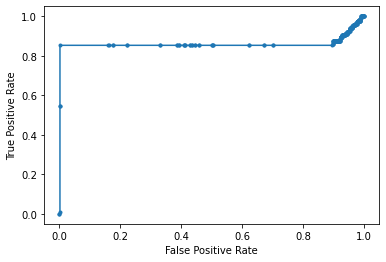

In [10]:
plt.plot(fprC, tprC, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

<h2>SVM</h2>

In [62]:
with open('yFNsvm.pkl', 'rb') as fid:
    yFNsvm = cPickle.load(fid)
with open('yFNsvmPred.pkl', 'rb') as fid:
    yFNsvmPred = cPickle.load(fid)

In [63]:
roc_auc_score(yFNsvm, yFNsvmPred)

0.9831619222528314

In [64]:
calculate_eer(yFNsvm, yFNsvmPred)

0.07272727272725141

In [17]:
fprS, tprS, thres = roc_curve(yFNsvm, yFNsvmPred)

In [14]:
bestF1 = 0
bestThres = 0
for t in thres:
    yPredT = [1 if x >= t else 0 for x in yFNsvmPred]
    f1s = f1_score(yFNsvm, yPredT)
    if f1s > bestF1:
        bestF1 = f1s
        bestThres = t
print('F1-score:', bestF1)
print('Melhor limiar:', bestThres)

F1-score: 0.912621359223301
Melhor limiar: 0.21050243526328433


Text(0, 0.5, 'True Positive Rate')

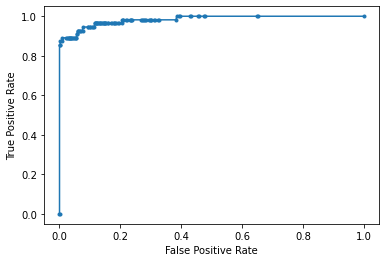

In [15]:
plt.plot(fprS, tprS, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

<h2>Rede siamesa</h2>

In [65]:
with open('actualFN2.pkl', 'rb') as fid:
    actualFN2 = cPickle.load(fid)
with open('predFN2.pkl', 'rb') as fid:
    predFN2 = cPickle.load(fid)

In [66]:
roc_auc_score(actualFN2, predFN2)

0.9610679687500001

In [67]:
calculate_eer(actualFN2, predFN2)

0.10464285714285713

In [19]:
fprRS, tprRS, thres = roc_curve(actualFN2, predFN2)

In [19]:
bestF1 = 0
bestThres = 0
for t in thres:
    yPredT = [1 if x >= t else 0 for x in predFN2]
    f1s = f1_score(actualFN2, yPredT)
    if f1s > bestF1:
        bestF1 = f1s
        bestThres = t
print('F1-score:', bestF1)
print('Melhor limiar:', bestThres)

F1-score: 0.9034653465346535
Melhor limiar: 0.7572632


Text(0, 0.5, 'True Positive Rate')

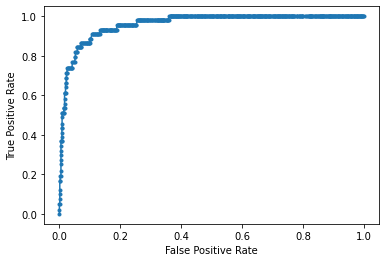

In [20]:
plt.plot(fprRS, tprRS, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

<h2>Todos</h2>

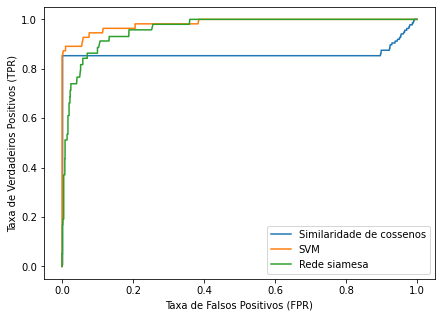

In [35]:
matplotlib.rcParams['figure.figsize'] = [7, 5]
plt.plot(fprC, tprC, label='Similaridade de cossenos')
plt.plot(fprS, tprS, label='SVM')
plt.plot(fprRS, tprRS, label='Rede siamesa')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()

<h1>Todas as faces</h1>

<h2>Similaridade de cossenos</h2>

In [68]:
with open('yTFcos.pkl', 'rb') as fid:
    yTFcos = cPickle.load(fid)
with open('yTFcosPred.pkl', 'rb') as fid:
    yTFcosPred = cPickle.load(fid)

In [69]:
roc_auc_score(yTFcos, yTFcosPred)

0.8275421490994588

In [70]:
calculate_eer(yTFcos, yTFcosPred)

0.18470588235294114

In [42]:
fprC, tprC, thres = roc_curve(yTFcos, yTFcosPred)

In [7]:
bestF1 = 0
bestThres = 0
for x in range(0,1000,5):
    t = x/1000
    yPredT = [1 if x >= t else 0 for x in yTFcosPred]
    f1s = f1_score(yTFcos, yPredT)
    if f1s > bestF1:
        bestF1 = f1s
        bestThres = t
print('F1-score:', bestF1)
print('Melhor limiar:', bestThres)

F1-score: 0.6335456475583865
Melhor limiar: 0.615


Text(0, 0.5, 'True Positive Rate')

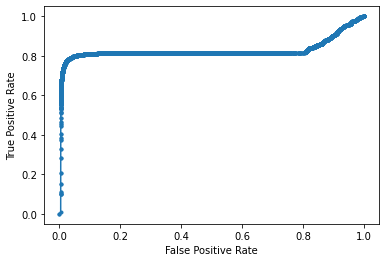

In [8]:
plt.plot(fprC, tprC, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

<h2>SVM</h2>

In [71]:
with open('yTFsvm.pkl', 'rb') as fid:
    yTFsvm = cPickle.load(fid)
with open('yTFsvmPred.pkl', 'rb') as fid:
    yTFsvmPred = cPickle.load(fid)

In [72]:
roc_auc_score(yTFsvm, yTFsvmPred)

0.8518861811589085

In [73]:
calculate_eer(yTFsvm, yTFsvmPred)

0.2442631442630603

In [38]:
fprS, tprS, thres = roc_curve(yTFsvm, yTFsvmPred)

In [39]:
bestF1 = 0
bestThres = 0
for x in range(0,1000,5):
    t = x/1000
    yPredT = [1 if x >= t else 0 for x in yTFsvmPred]
    f1s = f1_score(yTFsvm, yPredT)
    if f1s > bestF1:
        bestF1 = f1s
        bestThres = t
print('F1-score:', bestF1)
print('Melhor limiar:', bestThres)

F1-score: 0.46315077755240025
Melhor limiar: 0.875


Text(0, 0.5, 'True Positive Rate')

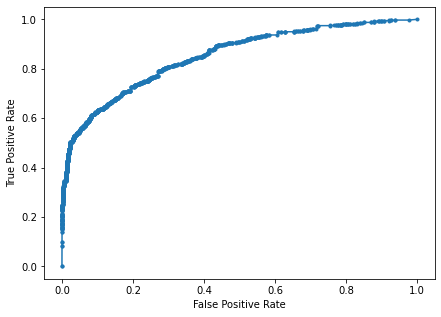

In [40]:
plt.plot(fprS, tprS, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

<h2>Rede siamesa</h2>

In [74]:
with open('actualTF.pkl', 'rb') as fid:
    actualTF = cPickle.load(fid)
with open('predTF.pkl', 'rb') as fid:
    predTF = cPickle.load(fid)

In [75]:
roc_auc_score(actualTF, predTF)

0.8877511199999999

In [76]:
calculate_eer(actualTF, predTF)

0.1933142857142857

In [44]:
fprRS, tprRS, thres = roc_curve(actualTF, predTF)

In [12]:
bestF1 = 0
bestThres = 0
for x in range(0,1000,5):
    t = x/1000
    yPredT = [1 if x >= t else 0 for x in predTF]
    f1s = f1_score(actualTF, yPredT)
    if f1s > bestF1:
        bestF1 = f1s
        bestThres = t
print('F1-score:', bestF1)
print('Melhor limiar:', bestThres)

F1-score: 0.8081091930951425
Melhor limiar: 0.72


Text(0, 0.5, 'True Positive Rate')

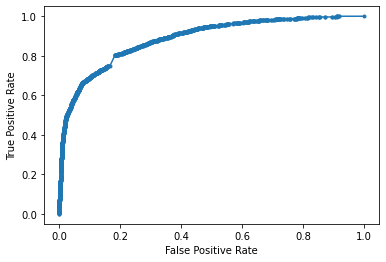

In [13]:
plt.plot(fprRS, tprRS, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

<h2>Todos</h2>

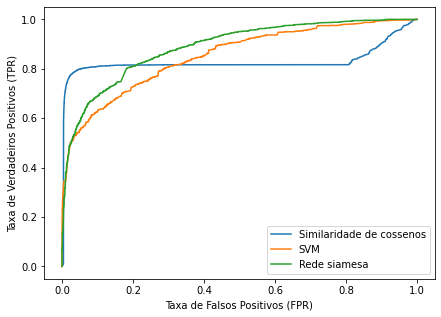

In [45]:
matplotlib.rcParams['figure.figsize'] = [7, 5]
plt.plot(fprC, tprC, label='Similaridade de cossenos')
plt.plot(fprS, tprS, label='SVM')
plt.plot(fprRS, tprRS, label='Rede siamesa')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()

<h1>Região ocular esquerda</h1>

<h2>Similaridade de cossenos</h2>

In [77]:
with open('yOlhoEsq.pkl', 'rb') as fid:
    yOlhoEsq = cPickle.load(fid)
with open('yOlhoEsqPred.pkl', 'rb') as fid:
    yOlhoEsqPred = cPickle.load(fid)

In [78]:
roc_auc_score(yOlhoEsq, yOlhoEsqPred)

0.7139952877435805

In [79]:
calculate_eer(yOlhoEsq, yOlhoEsqPred)

0.3293343653250748

In [48]:
fprC, tprC, thres = roc_curve(yOlhoEsq, yOlhoEsqPred)

In [49]:
bestF1 = 0
bestThres = 0
for x in range(0,1000,5):
    t = x/1000
    yPredT = [1 if x >= t else 0 for x in yOlhoEsqPred]
    f1s = f1_score(yOlhoEsq, yPredT)
    if f1s > bestF1:
        bestF1 = f1s
        bestThres = t
print('F1-score:', bestF1)
print('Melhor limiar:', bestThres)

F1-score: 0.26178635369007364
Melhor limiar: 0.84


Text(0, 0.5, 'True Positive Rate')

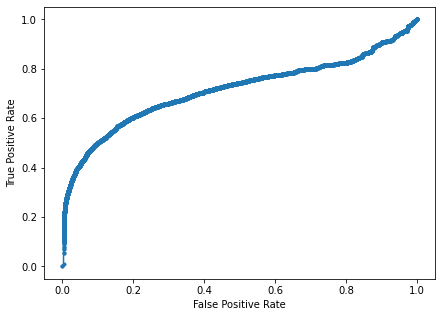

In [50]:
plt.plot(fprC, tprC, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

<h1>Região ocular direita</h1>

<h2>Similaridade de cossenos</h2>

In [80]:
with open('yOlhoDir.pkl', 'rb') as fid:
    yOlhoDir = cPickle.load(fid)
with open('yOlhoDirPred.pkl', 'rb') as fid:
    yOlhoDirPred = cPickle.load(fid)

In [81]:
roc_auc_score(yOlhoDir, yOlhoDirPred)

0.7223205143770615

In [82]:
calculate_eer(yOlhoDir, yOlhoDirPred)

0.31385448916408665

In [54]:
fprD, tprD, thres = roc_curve(yOlhoDir, yOlhoDirPred)

In [55]:
bestF1 = 0
bestThres = 0
for x in range(0,1000,5):
    t = x/1000
    yPredT = [1 if x >= t else 0 for x in yOlhoDirPred]
    f1s = f1_score(yOlhoDir, yPredT)
    if f1s > bestF1:
        bestF1 = f1s
        bestThres = t
print('F1-score:', bestF1)
print('Melhor limiar:', bestThres)

F1-score: 0.27683397683397687
Melhor limiar: 0.835


Text(0, 0.5, 'True Positive Rate')

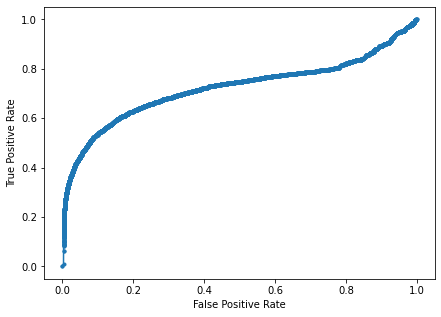

In [56]:
plt.plot(fprD, tprD, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

<h2>Todos</h2>

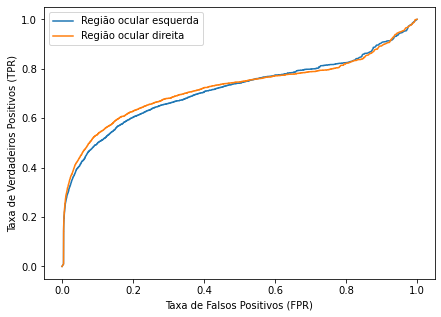

In [57]:
matplotlib.rcParams['figure.figsize'] = [7, 5]
plt.plot(fprC, tprC, label='Região ocular esquerda')
plt.plot(fprD, tprD, label='Região ocular direita')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()